# Decision Tree Classifier

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

In [2]:
# import dataset

path_to_file = './car_evaluation.csv'
df = pd.read_csv(path_to_file, header=None)

In [3]:
# view dimensions of dataset

df.shape

(1728, 7)

In [4]:
# preview the dataset

df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [5]:
# Rename column names

col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

df.columns = col_names

col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [6]:
# let's again preview the dataset

df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [7]:
# View summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [8]:
# Frequency distribution of values in variables

col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


for col in col_names:
    
    print(df[col].value_counts())

vhigh    432
high     432
med      432
low      432
Name: buying, dtype: int64
vhigh    432
high     432
med      432
low      432
Name: maint, dtype: int64
2        432
3        432
4        432
5more    432
Name: doors, dtype: int64
2       576
4       576
more    576
Name: persons, dtype: int64
small    576
med      576
big      576
Name: lug_boot, dtype: int64
low     576
med     576
high    576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64


In [9]:
# Explore class variable

df['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [10]:
# check missing values in variables

df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [11]:
# Declare feature vector and target variable

X = df.drop(['class'], axis=1)

y = df['class']

In [12]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 13)

In [13]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((1296, 6), (432, 6))

In [14]:
# check data types in X_train

X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

In [15]:
# We can see that all the variables are ordinal categorical data type.

X_train.head()

,buying,maint,doors,persons,lug_boot,safety
1694,low,low,4,more,small,high
1663,low,low,3,4,big,med
1609,low,med,5more,4,big,med
1289,med,low,5more,more,small,high
133,vhigh,high,2,more,big,med


### Encoding Data

In [16]:
# import category encoders

import category_encoders as ce

In [17]:
# encode variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [18]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
1694,1,1,1,1,1,1
1663,1,1,2,2,2,2
1609,1,2,3,2,2,2
1289,2,1,3,1,1,1
133,3,3,4,1,2,2


In [19]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
364,3,1,2,2,3,2
1178,2,2,3,2,2,1
1206,2,1,4,1,1,3
1542,1,2,2,3,3,3
776,4,1,4,1,1,1


### Decision Tree Classifier with criterion gini index

In [20]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

In [21]:
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=12)


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=12)

In [22]:
# Training set accuarcy
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array(['acc', 'acc', 'acc', ..., 'unacc', 'unacc', 'unacc'], dtype=object)

In [23]:
from sklearn.metrics import accuracy_score

print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.7917


In [24]:
# Testing test accuracy

y_pred_gini = clf_gini.predict(X_test)

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.7917


In [25]:
# Compare the train-set and test-set accuracy
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.7917
Test set score: 0.7917


#### Here, the training-set accuracy score is 0.7917 while the test-set accuracy to be 0.7917. These two values are quite comparable. So, there is no sign of overfitting.

### Visualize decision-trees

[Text(0.6666666666666666, 0.875, 'X[5] <= 2.5\ngini = 0.461\nsamples = 1296\nvalue = [289, 55, 904, 48]'),
 Text(0.5, 0.625, 'X[3] <= 2.5\ngini = 0.58\nsamples = 871\nvalue = [289, 55, 479, 48]'),
 Text(0.3333333333333333, 0.375, 'X[0] <= 2.5\ngini = 0.632\nsamples = 592\nvalue = [289, 55, 200, 48]'),
 Text(0.16666666666666666, 0.125, 'gini = 0.642\nsamples = 299\nvalue = [159, 55, 37, 48]'),
 Text(0.5, 0.125, 'gini = 0.494\nsamples = 293\nvalue = [130, 0, 163, 0]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 279\nvalue = [0, 0, 279, 0]'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 425\nvalue = [0, 0, 425, 0]')]

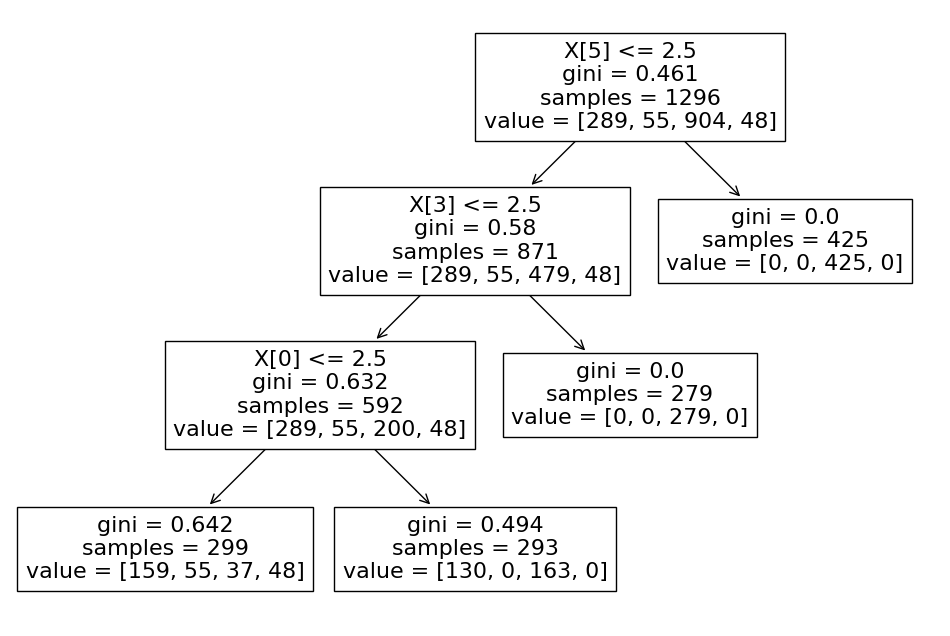

In [26]:
from sklearn import tree

plt.figure(figsize=(12,8))
tree.plot_tree(clf_gini.fit(X_train, y_train)) 

In [27]:
# Visualize decision-trees with graphviz

# import graphviz 
# dot_data = tree.export_graphviz(clf_gini, out_file=None, 
#                               feature_names=X_train.columns,  
#                               class_names=y_train,  
#                               filled=True, rounded=True,  
#                               special_characters=True)

# graph = graphviz.Source(dot_data) 

# graph

### Decision Tree Classifier with criterion entropy

In [28]:
# instantiate the DecisionTreeClassifier model with criterion entropy

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [29]:
y_pred_en = clf_en.predict(X_test)

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.7917


In [30]:
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en


array(['acc', 'acc', 'acc', ..., 'unacc', 'unacc', 'unacc'], dtype=object)

In [31]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.7917


In [32]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.7917
Test set score: 0.7917


[Text(0.6666666666666666, 0.875, 'X[5] <= 2.5\nentropy = 1.215\nsamples = 1296\nvalue = [289, 55, 904, 48]'),
 Text(0.5, 0.625, 'X[3] <= 2.5\nentropy = 1.485\nsamples = 871\nvalue = [289, 55, 479, 48]'),
 Text(0.3333333333333333, 0.375, 'X[0] <= 2.5\nentropy = 1.646\nsamples = 592\nvalue = [289, 55, 200, 48]'),
 Text(0.16666666666666666, 0.125, 'entropy = 1.731\nsamples = 299\nvalue = [159, 55, 37, 48]'),
 Text(0.5, 0.125, 'entropy = 0.991\nsamples = 293\nvalue = [130, 0, 163, 0]'),
 Text(0.6666666666666666, 0.375, 'entropy = 0.0\nsamples = 279\nvalue = [0, 0, 279, 0]'),
 Text(0.8333333333333334, 0.625, 'entropy = 0.0\nsamples = 425\nvalue = [0, 0, 425, 0]')]

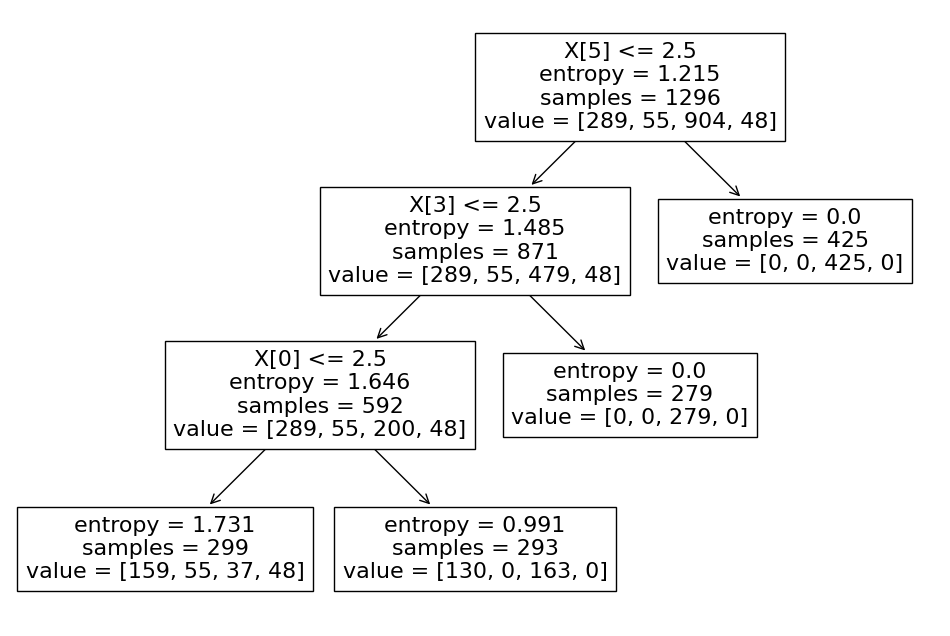

In [33]:
plt.figure(figsize=(12,8))

tree.plot_tree(clf_en.fit(X_train, y_train)) 

In [34]:
# dot_data = tree.export_graphviz(clf_en, out_file=None, 
#                               feature_names=X_train.columns,  
#                               class_names=y_train,  
#                               filled=True, rounded=True,  
#                               special_characters=True)

# graph = graphviz.Source(dot_data) 

# graph 

### 'gini', 'entropy', 'log_loss'

In [35]:
parameter = ["gini", "entropy"]

for i in range(2):
    model = DecisionTreeClassifier(criterion = parameter[i], max_depth=3, random_state=0)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)  
    print("For " + parameter[i] + " : ")
    print('Accuracy : {0:0.4f}' . format(accuracy_score(y_test, y_pred)))
    print('Train Score : {0:0.4f}' . format(model.score(X_train, y_train)))
    print('Test Score : {0:0.4f}' . format(model.score(X_test, y_test)))
    print("")

For gini : 
Accuracy : 0.7917
Train Score : 0.7917
Test Score : 0.7917

For entropy : 
Accuracy : 0.7917
Train Score : 0.7917
Test Score : 0.7917



### Max depth

In [36]:
for i in [1,2,3,4,5,20]:
    model = DecisionTreeClassifier(criterion = 'gini', max_depth=i, random_state=0)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)  
    print("For max_depth = {} : ".format(i))
    print('Accuracy : {0:0.4f}' . format(accuracy_score(y_test, y_pred)))
    print('Train Score : {0:0.4f}' . format(model.score(X_train, y_train)))
    print('Test Score : {0:0.4f}' . format(model.score(X_test, y_test)))
    print("")

For max_depth = 1 : 
Accuracy : 0.7083
Train Score : 0.6975
Test Score : 0.7083

For max_depth = 2 : 
Accuracy : 0.8125
Train Score : 0.7662
Test Score : 0.8125

For max_depth = 3 : 
Accuracy : 0.7917
Train Score : 0.7917
Test Score : 0.7917

For max_depth = 4 : 
Accuracy : 0.8611
Train Score : 0.8472
Test Score : 0.8611

For max_depth = 5 : 
Accuracy : 0.8681
Train Score : 0.8789
Test Score : 0.8681

For max_depth = 20 : 
Accuracy : 0.9815
Train Score : 1.0000
Test Score : 0.9815



### Random state

In [37]:
for i in [1,2,3,4,5]:
    model = DecisionTreeClassifier(criterion = 'gini', max_depth=20, random_state=i*10)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)  
    print("For max_depth = {} : ".format(i))
    print('Accuracy : {0:0.4f}' . format(accuracy_score(y_test, y_pred)))
    print('Train Score : {0:0.4f}' . format(model.score(X_train, y_train)))
    print('Test Score : {0:0.4f}' . format(model.score(X_test, y_test)))
    print("")

For max_depth = 1 : 
Accuracy : 0.9815
Train Score : 1.0000
Test Score : 0.9815

For max_depth = 2 : 
Accuracy : 0.9815
Train Score : 1.0000
Test Score : 0.9815

For max_depth = 3 : 
Accuracy : 0.9815
Train Score : 1.0000
Test Score : 0.9815

For max_depth = 4 : 
Accuracy : 0.9861
Train Score : 1.0000
Test Score : 0.9861

For max_depth = 5 : 
Accuracy : 0.9815
Train Score : 1.0000
Test Score : 0.9815



<AxesSubplot: >

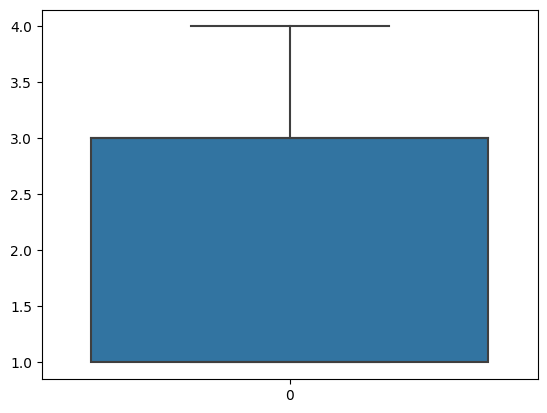

In [38]:
import seaborn as sns
sns.boxplot((X_train['buying']))

<AxesSubplot: >

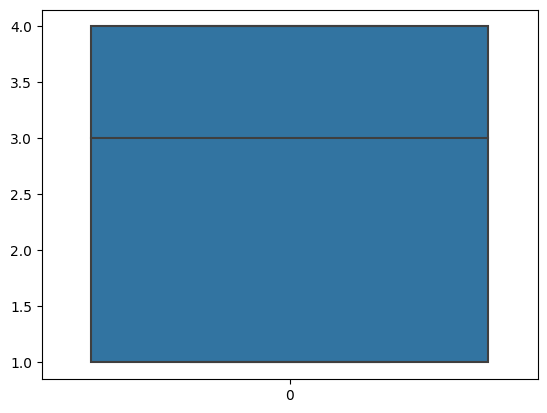

In [39]:
sns.boxplot((X_train['maint']))

<AxesSubplot: >

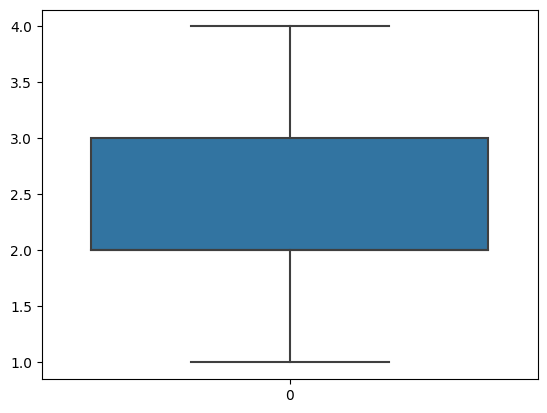

In [40]:
sns.boxplot((X_train['doors']))